In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Loading  Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/Dataset/Maternal-Health-Risk-Data-Set.csv')

In [4]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


##Checking the Dataset

In [5]:
df.sample(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
640,46,140,100,12.0,99.0,90,high risk
623,23,90,60,7.5,98.0,76,low risk
233,20,110,60,7.0,100.0,70,mid risk
26,19,120,75,7.2,98.0,66,low risk
983,40,140,100,18.0,98.0,77,high risk


In [6]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


<Axes: >

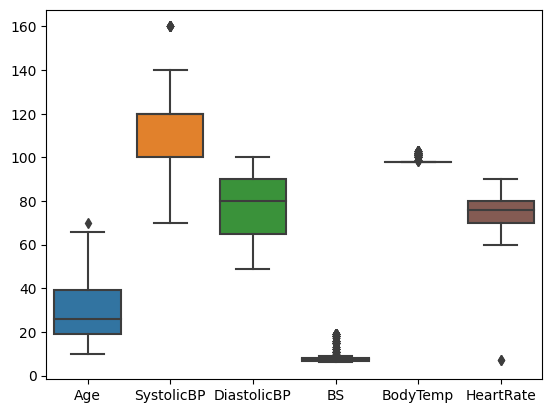

In [7]:
sns.boxplot(df)

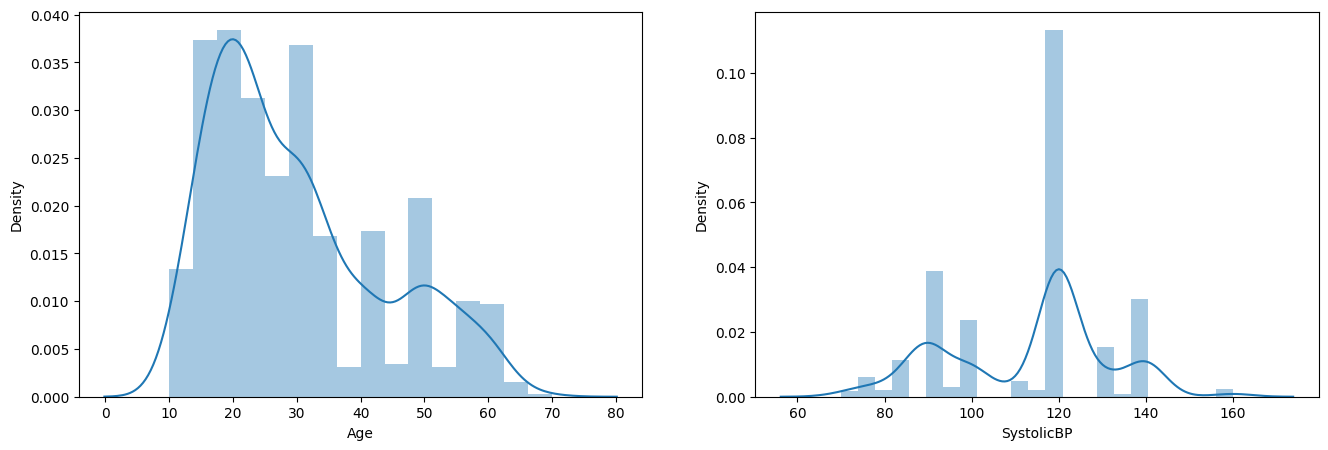

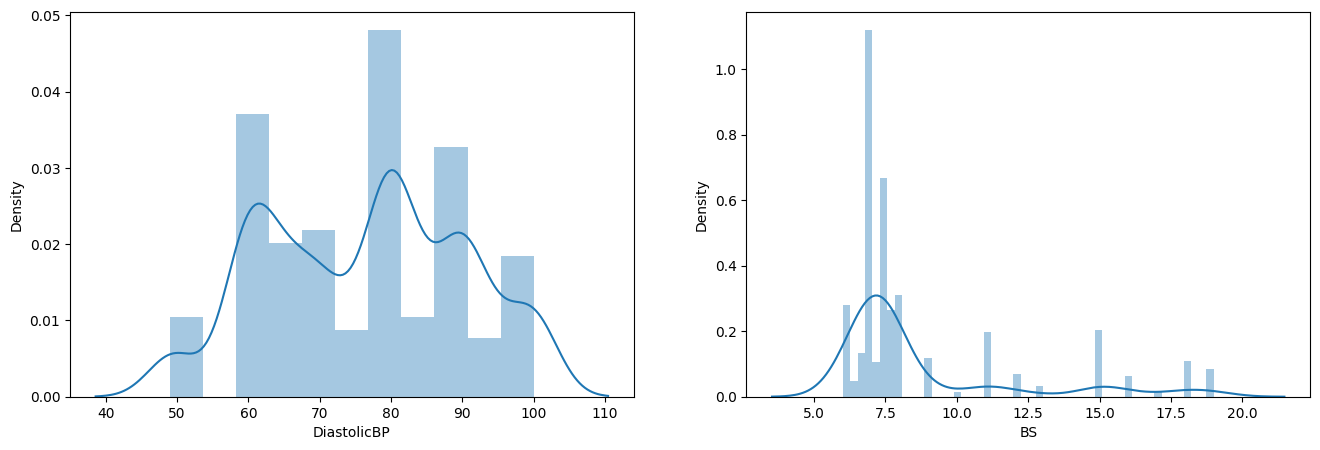

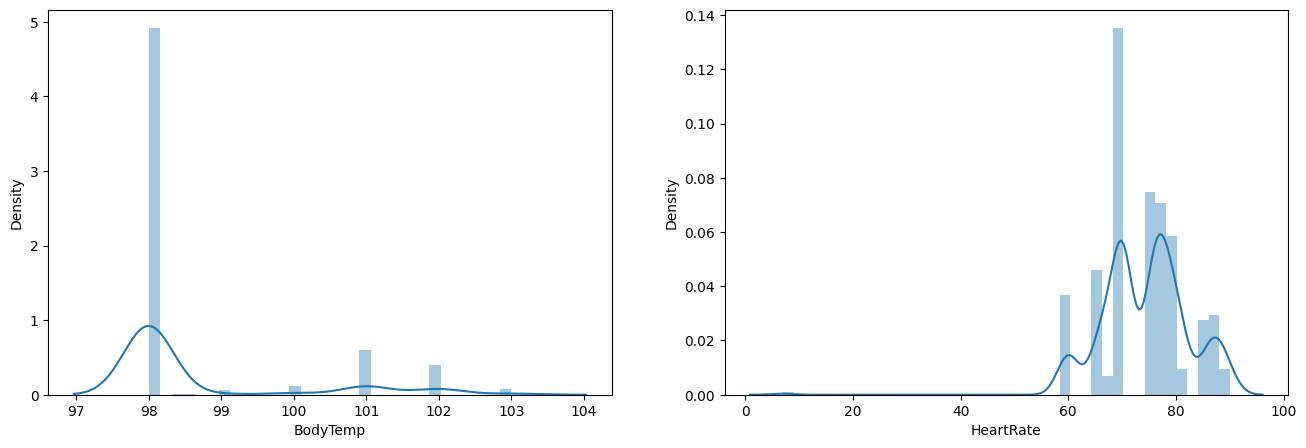

In [8]:
import warnings
warnings.filterwarnings('ignore')
for i in range(0,len(df.columns)-1,2):
  plt.figure(figsize=(16,5))
  plt.subplot(1,2,1)
  sns.distplot(df[df.columns[i]])
  i+=1
  plt.subplot(1,2,2)
  sns.distplot(df[df.columns[i]])
  plt.show()


##Custom Methods

In [9]:
from sklearn import metrics
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [120]:
#Cross Validation check with Stratified K-Fold

def crossValidation(df,cv,model,target="RiskLevel",average="macro"):
  num_folds = cv
  X = df.drop(columns=[target])
  y = df[target]

  # Initialize lists to store evaluation results for each fold
  fold_accuracies = []
  results={}

  # Perform k-fold cross-validation
  kf = StratifiedKFold(n_splits=num_folds,shuffle=True,random_state=42)
  accuracy = []
  train_accuracy = []
  precision = []
  recall = []
  f1 = []
  estimators = []
  for train_index,test_index in kf.split(X,y):

      # Split the data into training and test sets for the current fold
      X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]

      # Train model on the training set
      model.fit(X_train, y_train)
      estimators.append(model)
      y_pred = model.predict(X_test)
      accuracy.append(model.score(X_test, y_test))
      train_accuracy.append(model.score(X_train, y_train))
      precision.append(metrics.precision_score(y_test, y_pred, average=average))
      recall.append(metrics.recall_score(y_test, y_pred, average=average))
      f1.append(metrics.f1_score(y_test, y_pred, average=average))

  # Calculate the average accuracy across all folds
  average_accuracy = sum(accuracy) / num_folds
  results["Accuracy"] = accuracy
  results["Train_Accuracy"] = train_accuracy
  results["Precision"] = precision
  results["Recall"] = recall
  results["F1"] = f1
  results['Estimator'] = estimators

  # print("Average Accuracy:", average_accuracy)

  return results


In [121]:
#Cross Validation check with Stratified K-Fold

def crossValidation_X_y(df,cv,model,X,y,average="macro"):
  num_folds = cv

  # Initialize lists to store evaluation results for each fold
  fold_accuracies = []
  results={}
  # Perform k-fold cross-validation
  kf = StratifiedKFold(n_splits=num_folds,shuffle=True,random_state=42)
  accuracy = []
  train_accuracy = []
  precision = []
  recall = []
  f1 = []
  estimators = []
  for train_index,test_index in kf.split(X,y):

      # Split the data into training and test sets for the current fold
      X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]

      # Train your model on the training set
      model.fit(X_train, y_train)
      estimators.append(model)
      y_pred = model.predict(X_test)
      accuracy.append(model.score(X_test, y_test))
      train_accuracy.append(model.score(X_train, y_train))
      precision.append(metrics.precision_score(y_test, y_pred, average=average))
      recall.append(metrics.recall_score(y_test, y_pred, average=average))
      f1.append(metrics.f1_score(y_test, y_pred, average=average))

  # Calculate the average accuracy across all folds
  average_accuracy = sum(accuracy) / num_folds
  results["Accuracy"] = accuracy
  results["Train_Accuracy"] = train_accuracy
  results["Precision"] = precision
  results["Recall"] = recall
  results["F1"] = f1
  results['Estimator'] = estimators

  # print("Average Accuracy:", average_accuracy)

  return results


In [122]:
#Selecting the best model using

def select_best_estimator(results,metric="Accuracy"):
  best_model = results['Estimator'][0]
  best_accuracy = results[metric][0]
  for i in range(1,len(results[metric])):
    if best_accuracy < results[metric][i]:
      best_accuracy = results[metric][i]
      best_model = results['Estimator'][i]
  return (best_model,best_accuracy)


##IQR Based Filtering

In [13]:
def trimUsingIQR(trim_df):
  temp = trim_df.copy()
  for i in trim_df.columns:
    percentile25 = temp[i].quantile(0.25)
    percentile75 = temp[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    trim_df.drop(trim_df.loc[(trim_df[i]>upper_limit) | (trim_df[i]<lower_limit)].index,inplace=True)
    trim_df = trim_df.reset_index(drop=True)
  return trim_df

##Seperating Features and Target

In [14]:
X = df.drop(columns = 'RiskLevel')
y = df['RiskLevel']

##Detecting Outliers

In [15]:
def detectUsingIQR(trim_df):
  temp = trim_df.copy()
  for i in trim_df.columns[:-1]:
    percentile25 = temp[i].quantile(0.25)
    percentile75 = temp[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print(i)
    display(trim_df.loc[(trim_df[i]>upper_limit) | (trim_df[i]<lower_limit)])
detectUsingIQR(df)

Age


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
338,70,85,60,6.9,102.0,70,low risk


SystolicBP


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
123,40,160,100,19.0,98.0,77,high risk
130,40,160,100,19.0,98.0,77,high risk
166,40,160,100,19.0,98.0,77,high risk
262,40,160,100,19.0,98.0,77,high risk
362,40,160,100,19.0,98.0,77,high risk
538,40,160,100,19.0,98.0,77,high risk
583,40,160,100,19.0,98.0,77,high risk
689,40,160,100,19.0,98.0,77,high risk
961,40,160,100,19.0,98.0,77,high risk
994,40,160,100,19.0,98.0,77,high risk


DiastolicBP


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


BS


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
7,35,85,60,11.0,102.0,86,high risk
9,42,130,80,18.0,98.0,70,high risk
14,48,120,80,11.0,98.0,88,mid risk
...,...,...,...,...,...,...,...
1008,48,120,80,11.0,98.0,88,high risk
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk


BodyTemp


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
2,29,90,70,8.00,100.0,80,high risk
7,35,85,60,11.00,102.0,86,high risk
13,20,120,75,7.01,100.0,70,mid risk
18,30,120,80,6.90,101.0,76,mid risk
35,12,95,60,6.10,102.0,60,low risk
...,...,...,...,...,...,...,...
1000,12,90,60,11.00,102.0,60,high risk
1004,13,90,65,9.00,101.0,80,high risk
1005,17,90,65,7.70,103.0,67,high risk
1006,17,85,60,6.30,102.0,86,high risk


HeartRate


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


In [16]:
# Define mapping dictionary
risk_mapping = {'high risk': 3.0, 'mid risk': 2.0, 'low risk': 1.0}

# Convert string column to float using mapping dictionary
df['RiskLevel'] = df['RiskLevel'].map(risk_mapping)


###Trimming
(Removing Outlier using IQR method)


In [17]:
### Removing Outlier using IQR method
def trimUsingIQR(trim_df,columns):
  temp = trim_df.copy()
  for i in columns:
    percentile25 = temp[i].quantile(0.25)
    percentile75 = temp[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    trim_df.drop(trim_df.loc[(trim_df[i]>upper_limit) | (trim_df[i]<lower_limit)].index,inplace=True)
    trim_df = trim_df.reset_index(drop=True)
  return trim_df

In [18]:
trim_df = df.copy()

####Considering only Age and HeartRate Features
(As the two features consider to be not normal)

In [19]:
trim_df = trimUsingIQR(trim_df,["Age","HeartRate"])

In [20]:
trim_df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,29.859545,113.212661,76.479723,8.729426,98.663106,74.439169,1.870425
std,13.420985,18.407362,13.896589,3.297712,1.369084,7.524285,0.807162
min,10.000000,70.000000,49.000000,6.000000,98.000000,60.000000,1.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,1.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,2.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,3.000000
max,66.000000,160.000000,100.000000,19.000000,103.000000,90.000000,3.000000


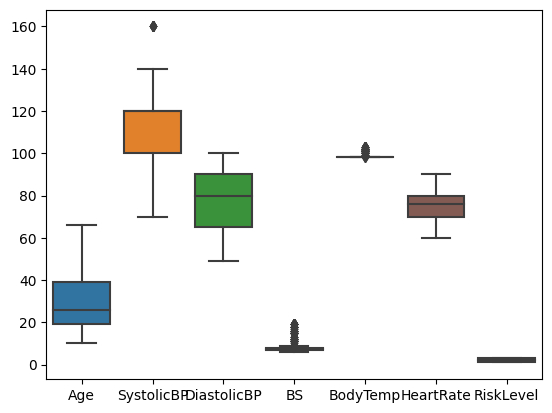

In [21]:
sns.boxplot(trim_df)
plt.savefig('/content/drive/MyDrive/CSE445/Pre-processing/Without_Feature_Engineering_After_Trim_BoxPlot.png')

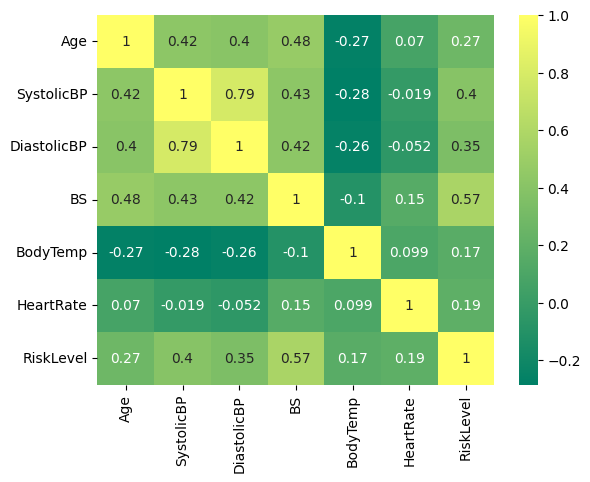

In [22]:
sns.heatmap(trim_df.corr(), annot = True, cmap = 'summer')
plt.savefig('/content/drive/MyDrive/CSE445/Pre-processing/Without_Feature_Engineering_After_Trim_correlation.png')
plt.show()

##Training Decision Tree with cross validation 5 on trimmed data



In [178]:
results_trim = crossValidation(df=trim_df,target="RiskLevel",cv=10,model=tree.DecisionTreeClassifier(),average="macro")
best_model_trim, acc_trimmed = select_best_estimator(results=results_trim,metric="Accuracy")

In [182]:
print("Accuracy of the Best Model (after trimming):",acc_trimmed)
c = 0
for i in results_trim.keys():
  print(i,sum(results_trim[i])/10)
  c += 1
  if c==4: break

Accuracy of the Best Model (after trimming): 0.900990099009901
Accuracy 0.8614929139972821
Train_Accuracy 0.9250462408878253
Precision 0.868523631929788
Recall 0.8662425978028561


In [183]:
Best_Decision_Model_trim = best_model_trim

In [184]:
results_trim["Train_Accuracy"]

[0.9207920792079208,
 0.9263736263736264,
 0.9274725274725275,
 0.9241758241758242,
 0.9285714285714286,
 0.9252747252747253,
 0.9263736263736264,
 0.9263736263736264,
 0.921978021978022,
 0.9230769230769231]

In [185]:
 results_trim["Accuracy"]

[0.8921568627450981,
 0.8811881188118812,
 0.8118811881188119,
 0.8613861386138614,
 0.8415841584158416,
 0.8316831683168316,
 0.8514851485148515,
 0.8613861386138614,
 0.8811881188118812,
 0.900990099009901]

##Training Random Forest with cross validation 5 on trimmed data



In [26]:
results_trim = crossValidation(df=trim_df,target="RiskLevel",cv=5,model=RandomForestClassifier(),average="macro")
best_model_trim, acc_trimmed = select_best_estimator(results=results_trim,metric="Accuracy")

In [27]:
print("Accuracy of the Best Model (after trimming):",acc_trimmed)

Accuracy of the Best Model (after trimming): 0.8817733990147784


In [28]:
Best_RandomForest_trim = best_model_trim

##Training KNN with cross validation 5 on trimmed data



In [29]:
results_trim = crossValidation(df=trim_df,target="RiskLevel",cv=5,model=KNeighborsClassifier(),average="macro")

In [30]:
best_model_trim, acc_trimmed = select_best_estimator(results=results_trim,metric="Accuracy")

In [31]:
print("Accuracy of the Best Model (after trimming):",acc_trimmed)

Accuracy of the Best Model (after trimming): 0.7178217821782178


In [32]:
Best_KNN_trim = best_model_trim

##Capping

In [33]:
def cappingUsingIQR(trim_df,columns):
  temp = trim_df.copy()
  for i in columns:
    percentile25 = temp[i].quantile(0.25)
    percentile75 = temp[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    trim_df[i][trim_df[i]>upper_limit] = np.percentile(trim_df[i], 99)
    trim_df[i][trim_df[i]<lower_limit] = np.percentile(trim_df[i], 1)
  return trim_df

###Considering only Age and HeartRate Features
(As the two features consider to be not normal for some records)

In [34]:
capped_df = df.copy()

In [35]:
capped_df = cappingUsingIQR(capped_df,["Age","HeartRate"])
capped_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,3.0
1010,55,120,90,18.0,98.0,60,3.0
1011,35,85,60,19.0,98.0,86,3.0
1012,43,120,90,18.0,98.0,70,3.0


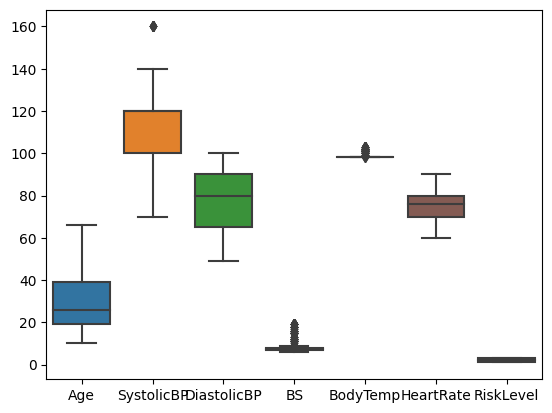

In [36]:
sns.boxplot(capped_df)
plt.savefig('/content/drive/MyDrive/CSE445/Pre-processing/Without_Feature_Engineering_After_capping_BoxPlot.png')

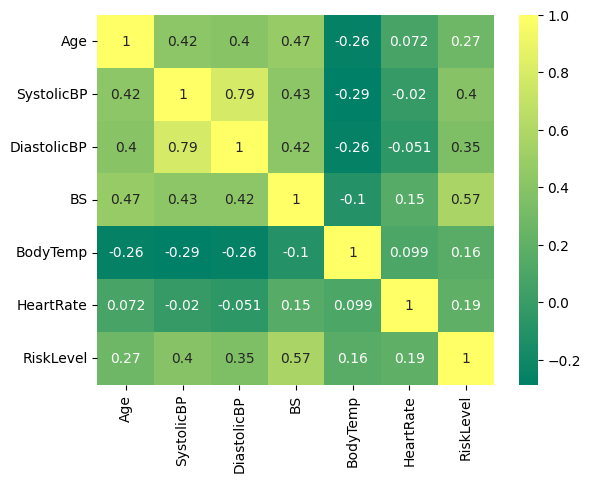

In [37]:
sns.heatmap(capped_df.corr(), annot = True, cmap = 'summer')
plt.savefig('/content/drive/MyDrive/CSE445/Pre-processing/Without_Feature_Engineering_After_Capping_correlation.png')
plt.show()

##Training Decision Tree with cross validation 5 (capped)

In [38]:
results_capped = crossValidation(df=capped_df,cv=5,model=tree.DecisionTreeClassifier(),average="macro")

In [39]:
best_model_capped, acc_capped = select_best_estimator(results=results_capped,metric="Accuracy")

In [40]:
acc_capped

0.8861386138613861

In [41]:
Best_Decision_Model_capped = best_model_capped

##Training Random Forest with cross validation 5 (capped)

In [42]:
results_capped = crossValidation(df=capped_df,cv=5,model=RandomForestClassifier(),average="macro")

In [43]:
best_model_capped, acc_capped = select_best_estimator(results=results_capped,metric="Accuracy")

In [44]:
acc_capped

0.8811881188118812

In [45]:
Best_RandomForest_capped = best_model_capped

##Training KNN with cross validation 5

In [46]:
results_capped = crossValidation(df=capped_df,cv=5,model=KNeighborsClassifier(),average="macro")

In [47]:
best_model_capped, acc_capped = select_best_estimator(results=results_capped,metric="Accuracy")

In [48]:
acc_capped

0.6995073891625616

In [49]:
Best_KNN_capped = best_model_capped

#Train on the initial dataset

###Applying Decision Tree

In [50]:
results = crossValidation(df=df,cv=5,model=tree.DecisionTreeClassifier(),average="macro")

In [51]:
best_model , acc = select_best_estimator(results,"Accuracy")

In [52]:
print("Best accuracy for Decision Tree: ",acc)

Best accuracy for Decision Tree:  0.8811881188118812


In [53]:
Best_Model_Decision_tree = best_model

###Applying Random Forest

In [54]:
results = crossValidation(df=df,cv=5,model=RandomForestClassifier(),average="macro")

In [55]:
best_model , acc = select_best_estimator(results,"Accuracy")

In [56]:
print("Best accuracy for Random Forest : ",acc)

Best accuracy for Random Forest :  0.8762376237623762


In [57]:
Best_Model_Random_Forest = best_model

###Applying Logistic Regression

In [58]:
results = crossValidation(df=df,cv=5,model=LogisticRegression(),average="macro")

In [59]:
best_model , acc = select_best_estimator(results,"Accuracy")

In [60]:
print("Best accuracy for Logistic Regression: ",acc)

Best accuracy for Logistic Regression:  0.625615763546798


In [61]:
Best_Model_Logistic_Regression = best_model

###Applying KNN Classifier

In [62]:
results = crossValidation(df=df,cv=5,model=KNeighborsClassifier(n_neighbors=5),average="macro")

In [63]:
best_model , acc = select_best_estimator(results,"Accuracy")

In [64]:
print("Best accuracy for Support Vector: ",acc)

Best accuracy for Support Vector:  0.6995073891625616


In [65]:
Best_Model_KNN = best_model

###Applying Support Vector Classifier

In [66]:
results = crossValidation(df=df,cv=5,model=svm.SVC(),average="macro")

In [67]:
best_model , acc = select_best_estimator(results,"Accuracy")

In [68]:
print("Best accuracy for Support Vector Classification: ",acc)

Best accuracy for Support Vector Classification:  0.6551724137931034


In [69]:
Best_Model_SVC = best_model

###Applying Gradient Decent Classifier

In [70]:
results = crossValidation(df=df,cv=5,model=SGDClassifier(loss="hinge", penalty="l2", max_iter=5),average="macro")

In [71]:
best_model , acc = select_best_estimator(results,"Accuracy")

In [72]:
print("Best accuracy for Support Vector Classification: ",acc)

Best accuracy for Support Vector Classification:  0.5517241379310345


In [73]:
Best_Model_GDC = best_model

#Using Smote for target class imbalance

In [74]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y.value_counts()

high risk    406
low risk     406
mid risk     406
Name: RiskLevel, dtype: int64

In [75]:
y.describe()

count          1218
unique            3
top       high risk
freq            406
Name: RiskLevel, dtype: object

###Applying Decision Tree


In [76]:

results = crossValidation_X_y(df=df,X=X,y=y,cv=5,model=tree.DecisionTreeClassifier(),average="macro")

In [77]:
best_model , acc = select_best_estimator(results,"Accuracy")

In [78]:
print("Best accuracy for Decision Tree : ",acc)

Best accuracy for Decision Tree :  0.8724279835390947


In [79]:
Best_Model_Decision_Tree_Smote = best_model

###Applying Random Forest

In [80]:
results = crossValidation_X_y(df=df,X=X,y=y,cv=5,model=RandomForestClassifier(),average="macro")

In [81]:
print("After using smote best decision tree accuracy:",acc)

After using smote best decision tree accuracy: 0.8724279835390947


In [82]:
Best_Model_Random_Forest_Smote = best_model

###Applying Logistic Regression

In [83]:

results = crossValidation_X_y(df=df,X=X,y=y,cv=5,model=LogisticRegression(),average="macro")

In [84]:
best_model , acc = select_best_estimator(results,"Accuracy")

In [85]:
print("Best accuracy for Logistic Regression: ",acc)

Best accuracy for Logistic Regression:  0.6255144032921811


In [86]:
Best_Model_Logistic_Regression_Smote = best_model

###Applying Support Vector Classifier

In [87]:
results = crossValidation_X_y(df=df,X=X,y=y,cv=5,model=svm.SVC(),average="macro")

In [88]:
best_model , acc = select_best_estimator(results,"Accuracy")

In [89]:
print("Best accuracy for Support Vector: ",acc)

Best accuracy for Support Vector:  0.6024590163934426


In [90]:
Best_Model_SVC_Smote = best_model

###Applying Naive Bayes Classifier

In [91]:
results = crossValidation_X_y(df=df,X=X,y=y,cv=5,model=GaussianNB(),average="macro")

In [92]:
best_model , acc = select_best_estimator(results,"Accuracy")

In [93]:
print("Best accuracy for Support Vector: ",acc)

Best accuracy for Support Vector:  0.6311475409836066


In [94]:
Best_Model_Naive_Bayes_Smote = best_model

###Applying KNN Classifier

In [95]:
results = crossValidation_X_y(df=df,X=X,y=y,cv=5,model=KNeighborsClassifier(n_neighbors=5),average="macro")

In [96]:
best_model , acc = select_best_estimator(results,"Accuracy")

In [97]:
print("Best accuracy for Support Vector: ",acc)

Best accuracy for Support Vector:  0.7736625514403292


In [98]:
Best_Model_KNN_Smote = best_model

#Therefore we use KNN, Decision tree and Random Forest for the voting Classifier



In [99]:
# Best_Decision_Model_trim= 89.2
# Best_RandomForest_trim = 88.70
# Best_KNN_trim = 71.78

In [100]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Model Selection For Voting Classifer

In [102]:
from sklearn.model_selection import train_test_split
# def VotingClassifier_():
eclf = VotingClassifier(estimators=[('DM', Best_Decision_Model_trim), ('RF', Best_RandomForest_trim), ('KNN', Best_KNN_trim)],
                      voting='soft',weights=[1,2,1])
results = crossValidation(df=df,cv=5,model=eclf,average="macro")
model,acc_voting = select_best_estimator(results,"Accuracy")
model


VotingClassifier(estimators=[('DM', DecisionTreeClassifier()),
                             ('RF', RandomForestClassifier()),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft', weights=[1, 2, 1])

In [103]:
print("Accuracy for voting classifer(soft) : ",acc_voting)

Accuracy for voting classifer(soft) :  0.8817733990147784


In [104]:
for i in results.keys():
  print(results[i])

[0.8817733990147784, 0.8472906403940886, 0.812807881773399, 0.8177339901477833, 0.8712871287128713]
[0.8804235907461714, 0.850174449812131, 0.8212553212553213, 0.826068869266486, 0.8800196958091696]
[0.8906902077714681, 0.8487171326308971, 0.8177450597059869, 0.8259501331396756, 0.8770345801854923]
[0.884004884004884, 0.8493531836348419, 0.8174420792345322, 0.8252458577486307, 0.8774444333642158]
[VotingClassifier(estimators=[('DM', DecisionTreeClassifier()),
                             ('RF', RandomForestClassifier()),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft', weights=[1, 2, 1]), VotingClassifier(estimators=[('DM', DecisionTreeClassifier()),
                             ('RF', RandomForestClassifier()),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft', weights=[1, 2, 1]), VotingClassifier(estimators=[('DM', DecisionTreeClassifier()),
                             ('RF', RandomForestClassi

In [105]:
X_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
808,23,120,90,7.900000,98.0,70
830,22,120,90,7.500000,98.0,82
581,16,100,70,7.500000,98.0,80
974,33,120,75,10.000000,98.0,70
519,30,140,100,15.000000,98.0,70
...,...,...,...,...,...,...
1044,40,120,95,11.000000,98.0,80
1095,32,140,90,18.000000,98.0,88
1130,34,120,75,9.446003,98.0,70
860,17,90,63,6.900000,101.0,70


##Applying Explainable AI

In [106]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
import lime
from lime import lime_tabular
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data = np.array(X_train),
    feature_names = X_train.columns,
    mode = 'classification'
)

In [108]:
exp = interpretor.explain_instance(
    data_row = X_test.iloc[4],
    predict_fn = model.predict_proba
)

exp.show_in_notebook(show_table = True, show_all = False)

#Saving the Best Model Decision Tree

In [109]:
import joblib

In [110]:
joblib.dump(Best_Decision_Model_trim, '/content/drive/MyDrive/CSE445/best_model.joblib')

['/content/drive/MyDrive/CSE445/best_model.joblib']

##Checking whether the model is loadable

In [111]:
model_loaded= joblib.load('/content/drive/MyDrive/CSE445/best_model.joblib')

In [112]:
model_loaded.predict([X.loc[0]])

array([3.])

## Final Best Model ROC and Accuracy Curve

In [212]:
from matplotlib import pyplot as plt

In [213]:
x_axis =[i for i in range(1,len(results_trim["Train_Accuracy"])+1)]
x_axis

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [214]:
y1_axis = [i*100 for i in results_trim["Train_Accuracy"]]
y1_axis

[92.07920792079209,
 92.63736263736264,
 92.74725274725274,
 92.41758241758242,
 92.85714285714286,
 92.52747252747253,
 92.63736263736264,
 92.63736263736264,
 92.1978021978022,
 92.3076923076923]

In [215]:
y2_axis = [i*100 for i in results_trim["Accuracy"]]
y2_axis

[89.2156862745098,
 88.11881188118812,
 81.1881188118812,
 86.13861386138613,
 84.15841584158416,
 83.16831683168317,
 85.14851485148515,
 86.13861386138613,
 88.11881188118812,
 90.0990099009901]

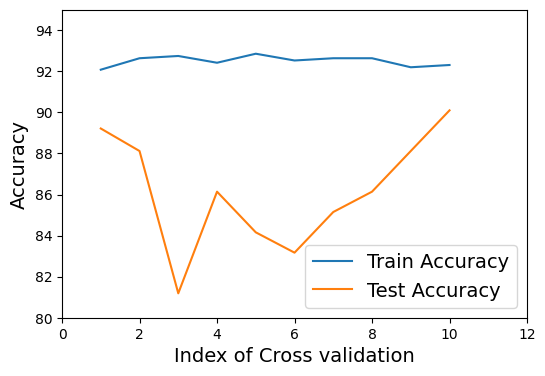

In [244]:
fig,ax = plt.subplots(figsize=(6,4))
sns.lineplot(x=x_axis,y=y1_axis,ax=ax,palette='nipy_spectral', label="Train Accuracy")
sns.lineplot(x=x_axis,y=y2_axis,ax=ax,palette='nipy_spectral', label="Test Accuracy")
ax.set(xlim=(0, 12),ylim=(80,95))
plt.xlabel("Index of Cross validation")
plt.ylabel("Accuracy")
plt.show()

In [217]:
# !pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [218]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/Dataset/Maternal-Health-Risk-Data-Set.csv')

In [219]:
X = df.drop(["RiskLevel"],axis=1)
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


In [227]:
y = df["RiskLevel"]
y

0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dtype: object

In [228]:
# Define mapping dictionary
risk_mapping = {'high risk': 3.0, 'mid risk': 2.0, 'low risk': 1.0}

# Convert string column to float using mapping dictionary
y = y.map(risk_mapping)


In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(811, 6) (811,) (203, 6) (203,)


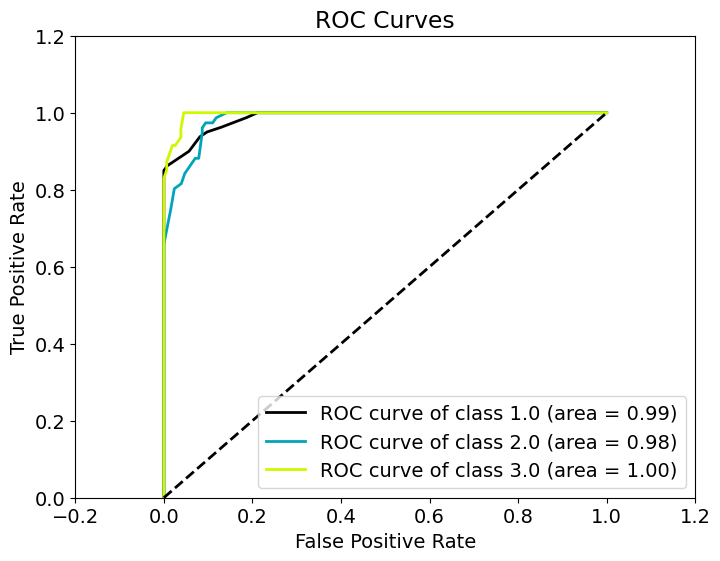

In [240]:
import scikitplot as skplt
fig,ax = plt.subplots(figsize=(8,6))

y_probas = Best_Decision_Model_trim.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas,ax=ax, plot_micro = False, plot_macro = False)
ax.set(xlim=(-.2, 1.2),ylim=(0,1.2))
plt.savefig('/content/drive/MyDrive/CSE445/ROC Curve-Decision Tree.png')
plt.show();